In [33]:
from tweet import *
from candidate import *
import pandas as pd
import numpy as np
import tweepy
import json
import calendar
import datetime
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
#TODO: Fill this in

consumer_key = "BeC8UJbqCHyX6pTWAvEvvIcGJ"
consumer_secret = "IwEzqplLUKar6MFZ7l828tLbEpxG3ObD49llOSPJ6Y6phKzVYT"
access_token = "727703646331240448-31ZFnJzKYfDcHh3HIgBhd1FfU3W7VaO"
access_token_secret = "GprFSIZ18ukkn9lZb7INfEn78miwkXzWpkzyJ6ocLAg6J"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [3]:
month_abbrs = dict((v,k) for k,v in enumerate(calendar.month_abbr))

In [30]:
def get_tweet_time(time_str):
    global month_abbrs
    time_lst = time_str.split(" ")
    year = int(time_lst[-1])
    day = int(time_lst[2])
    month = month_abbrs[time_lst[1]]
    return datetime.date(year, month, day)    

In [32]:
startDate =   datetime.datetime(2019, 6, 1, 0, 0, 0)
# startDate =   datetime.datetime(2019, 11, 1, 0, 0, 0)
endDate = datetime.datetime(2019, 11, 2, 0, 0, 0)
tweets = {}
cand_handles = ['AndrewYang', 'ewarren', 'PeteButtigieg', 'BernieSanders', 
                'MichaelBennet', 'amyklobuchar', 'KamalaHarris', 'TulsiGabbard', 
                'JulianCastro', 'CoryBooker', 'JoeBiden']

for cand_name in cand_handles:
    cand_tweets = []
    tweets[cand_name] = cand_tweets
    tmpTweets = api.user_timeline(cand_name, tweet_mode='extended')
    for t in tmpTweets:
        if t.created_at < endDate and t.created_at > startDate:
            cand_tweets.append(t)
    if len(cand_tweets) > 0:
        print(cand_tweets)
    try:
        while (tmpTweets[-1].created_at > startDate):
            tmpTweets = api.user_timeline(cand_name, max_id = tmpTweets[-1].id, tweet_mode='extended')
            for ti in tmpTweets:
                if ti.created_at < endDate and ti.created_at > startDate:
                    t = ti._json
                    tw_obj = Tweet(t['full_text'], get_tweet_time(t['created_at']), cand_name)
                    if 'media' in t['entities']:
                        tw_obj.contains_media()
                    if len(t['entities']['urls']) > 0:
                        tw_obj.contains_link()
                    if t['in_reply_to_screen_name'] and t['in_reply_to_screen_name'] != cand_name:
                        tw_obj.is_response()
                    cand_tweets.append(tw_obj)
    except:
        print(len(cand_tweets))
        print(len(tmpTweets))

2692


In [26]:
warren_tweets = tweets['ewarren']
print(len(tweets['ewarren']))
zzzzzzzzzzz = 0
for i in range(len(warren_tweets)):
    if (warren_tweets[i]._clean_text).count(" ") > 25:
        print(warren_tweets[i]._raw_text)
        print(warren_tweets[i].get_sentiment()[0])
        
        zzzzzzzzzzz += 1
print(zzzzzzzzzzz)

32
Private sector employers are projected to spend $9 trillion on health care over the next ten years. Under my #MedicareForAll plan, employers will save $200 billion—while families will save $11 trillion. Read more about what my plan will mean for you. https://t.co/uit4530iQg
-0.078125
The Trump administration has pushed construction of the Keystone XL pipeline despite the known environmental and public health risks. North Dakotans deserve better than this. We need clean energy to protect our public lands and waters. https://t.co/kFC5PMO89v
0.21666666666666667
This analysis was led by Dr. Donald Berwick, one of the nation's top experts in health care improvement who ran the Medicare and Medicaid programs under President Obama; and Simon Johnson, the former Chief Economist at the International Monetary Fund and a professor at MIT.
0.16666666666666666
Achieving #MedicareForAll isn’t going to be easy, but I’m in this race to fight for American families. In the coming weeks, I will also r

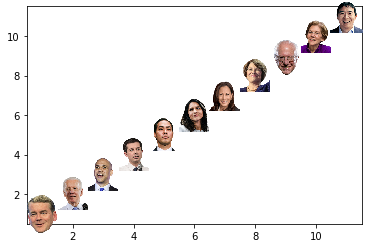

In [76]:
def getImage(path):
    if path == 'images/sanders.png':
        return OffsetImage(plt.imread(path), zoom = 0.1, interpolation='gaussian')
    elif path == 'images/bennet.png':
    else:
        return OffsetImage(plt.imread(path), zoom = 0.03, interpolation='gaussian')

paths = ['images/bennet.png',
        'images/biden.png',
        'images/booker.png',
        'images/buttigieg.png',
        'images/castro.png',
        'images/gabbard.png',
        'images/harris.png',
        'images/klobuchar.png',
        'images/sanders.png',
        'images/warren.png',
        'images/yang.png']

x = [i+1 for i in range(len(paths))]
y = [i+1 for i in range(len(paths))]
# x = [0,1,2,3,4]
# y = [0,1,2,3,4]

fig, ax = plt.subplots()
ax.scatter(x, y) 

# for x0, y0, path in zip(x, y,paths):
for i in range(len(paths)):
#     ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False) # , box_alignment=(0.3,0.3))
    ab = AnnotationBbox(getImage(paths[i]), (x[i], y[i]), frameon=False) # , box_alignment=(0.3,0.3))
    ax.add_artist(ab)
    
plt.savefig('my_figure.pdf', bbox_inches='tight', dpi=400)